In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd

In [25]:
data = pd.read_csv('data/X_train.csv', index_col='PassengerId')

In [26]:
y = data["Survived"]
X = data.drop('Survived', axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [28]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
logreg_acc

0.8324022346368715

In [30]:
(pd.DataFrame(logreg.coef_, index=['Correlation'], columns=X.columns).
 T.sort_values(by='Correlation', ascending=False))

,Correlation
Sex,2.115941
label_SOTON,1.201807
status,0.463578
Embarked,0.231878
label_none,-0.005305
label_rare,-0.061350
label_CA,-0.078773
is_alone,-0.082049
age*class,-0.115039
Fare,-0.168513


### Support Vector Machines

In [31]:
from sklearn.svm import SVC, LinearSVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.8156424581005587

### KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.7821229050279329

### GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian_acc = accuracy_score(y_test, y_pred)
gaussian_acc

0.7597765363128491

### Perceptron

In [34]:
from sklearn.linear_model import Perceptron


perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_acc = accuracy_score(y_test, y_pred)
perceptron_acc

0.7877094972067039

### Linear SVC

In [35]:
from sklearn.svm import SVC, LinearSVC


linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_acc = accuracy_score(y_test, y_pred)
linear_svc_acc

C:\Users\user\.conda\envs\py310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8156424581005587

### Stochastic Gradient Descent

In [36]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)
sgd_acc

0.7988826815642458

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.8156424581005587

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
acc_random_forest

0.8212290502793296

### Градиентный бустинг

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [40]:
gbdt = GradientBoostingClassifier(random_state=123)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

In [41]:
param_grid = {
    "max_depth": [2, 3],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    # "min_child_weight":[4, 5, 6],
    "subsample": [0.8, 0.9, 1]
}

In [42]:
CV_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)

In [43]:
CV_gbdt.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 1/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.798 total time=   0.0s
[CV 2/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 2/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.764 total time=   0.0s
[CV 3/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 3/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.803 total time=   0.0s
[CV 4/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 4/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8;, score=0.758 total time=   0.0s
[CV 1/4; 2/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.9
[CV 1/4; 2/54] END learning_rate=0.01, max_depth=

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=1000)

In [44]:
CV_gbdt.best_score_

0.8146067415730337

In [45]:
bp = CV_gbdt.best_params_
bp

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}

In [46]:
from sklearn.metrics import accuracy_score


gbc = GradientBoostingClassifier(random_state=123, 
                                 **bp)
gbc.fit(X_train, y_train)

print(f"Accuracy на тренировочной выборке - {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Accuracy на тестовой выборке - {accuracy_score(y_test, gbc.predict(X_test))}")

Accuracy на тренировочной выборке - 0.851123595505618
Accuracy на тестовой выборке - 0.8491620111731844


### Рандом форест

In [47]:
from sklearn.ensemble import RandomForestClassifier

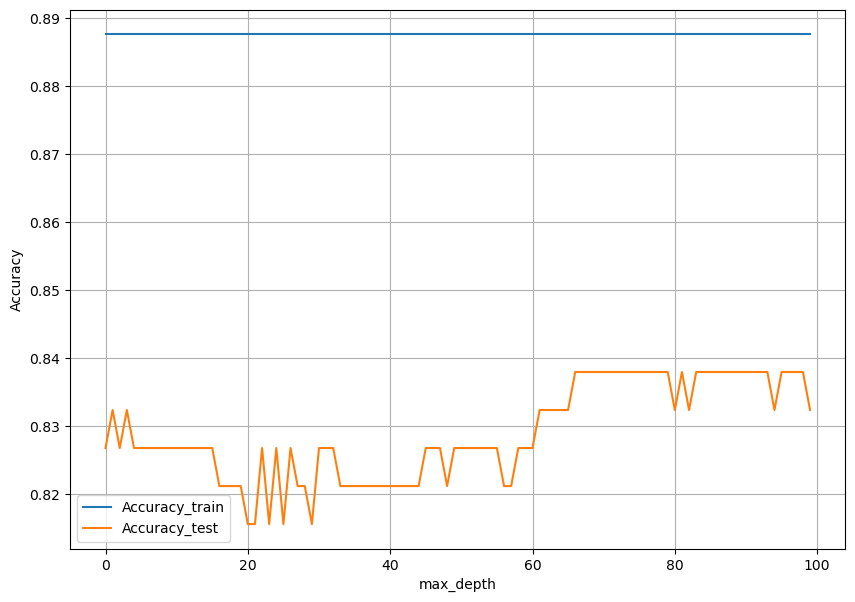

In [48]:
max_depth = 150
train_loss = []
test_loss = []

for i in range(50, max_depth):
    rf = RandomForestClassifier(n_estimators=i, max_depth=15, random_state=123, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_loss.append(accuracy_score(y_train, rf.predict(X_train)))
    test_loss.append(accuracy_score(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(train_loss, label = 'Accuracy_train')
plt.plot(test_loss, label = 'Accuracy_test')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend();

In [49]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              "n_estimators": [50, 100, 400, 700, 1000]}

rf = RandomForestClassifier(random_state=123, n_jobs=-1)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

CVrf = GridSearchCV(estimator=rf, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)
CVrf.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV 1/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.815 total time=   3.3s
[CV 2/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.775 total time=   0.0s
[CV 3/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.815 total time=   0.0s
[CV 4/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.781 total time=   0.0s
[CV 1/4; 2/150] START criterion=gini, min_samples_lea

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             scoring='accuracy', verbose=1000)

In [50]:
CVrf.best_score_

0.803370786516854

In [51]:
CVrf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [52]:
rfc = RandomForestClassifier(max_depth=9, **{'criterion': 'entropy',
                                             'min_samples_leaf': 1,
                                             'min_samples_split': 16,
                                             'n_estimators': 1000})
rfc.fit(X_train, y_train)

print(f"Accuracy_train: {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Accuracy_test: {accuracy_score(y_test, rfc.predict(X_test))}")

Accuracy_train: 0.851123595505618
Accuracy_test: 0.8547486033519553


In [63]:
cols = X_train.columns
pd.DataFrame(rfc.feature_importances_, index=cols)#.sort_values(0, ascending=False)

,0
Pclass,0.132373
Sex,0.242186
Age,0.047444
Fare,0.084320
Embarked,0.035641
status,0.254247
is_alone,0.030305
age*class,0.102546
label_CA,0.011504
label_SC/PARIS,0.004034


In [60]:
X_train

,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class,label_CA,label_SC/PARIS,label_SOTON,label_W/C,label_none,label_rare
PassengerId,,,,,,,,,,,,,,
330,1,1,0,3,1,2,0,0,0,0,0,0,1,0
750,3,0,1,0,2,1,1,3,0,0,0,0,1,0
204,3,0,2,0,1,1,1,6,0,0,0,0,1,0
422,3,0,1,0,2,1,1,3,0,0,0,0,0,0
98,1,0,1,3,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,1,2,2,0,3,0,4,0,0,0,0,1,0
323,2,1,1,1,2,2,1,2,0,0,0,0,1,0
383,3,0,1,1,0,1,1,3,0,0,1,0,0,0
